In [119]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
import h5py
from scipy.optimize import curve_fit
from scipy.special import factorial
from scipy.stats import poisson

#this sets the size of the plot to something useful
plt.rcParams["figure.figsize"] = (10,10)

Problem 1
First start by throwing a signal-free background. For Problem 1 choose a Normal distribution with some modest  𝜎 , say in the range 2-5. Create a million background events.

Now we need to make some signal. Let us choose to make signals of random strength on the interval of 0-20. Now it is critically important that you throw these using a uniform distribution. A uniform distribution means that the signal is equally likely to be small/faint (near zero) as large/bright (near 20). Mathematically this is the  𝑃(𝑠𝑖𝑔𝑛𝑎𝑙)  in the equation. If you use another way of simulating signals that does not have a uniform distribution, you are injecting an implicit prior (very, very bad).

Now add your signal to your background to create fake data readings. Since you know what the true signal was for each data reading, and you used a flat prior, you now have  𝑃(𝑑𝑎𝑡𝑎|𝑠𝑖𝑔𝑛𝑎𝑙)𝑃(𝑠𝑖𝑔𝑛𝑎𝑙) .

Now make one of the 2D histograms as shown in class. Here we want to histogram the signal vs. the simulated data readings. There are a couple of ways to do this, but it will be easier later if you define your bin edges explicitly, make a histogram, then plot it. Here is the code I used for the plot in class:

Text(0.5, 0, 'Observed data, $P(d|s)$')

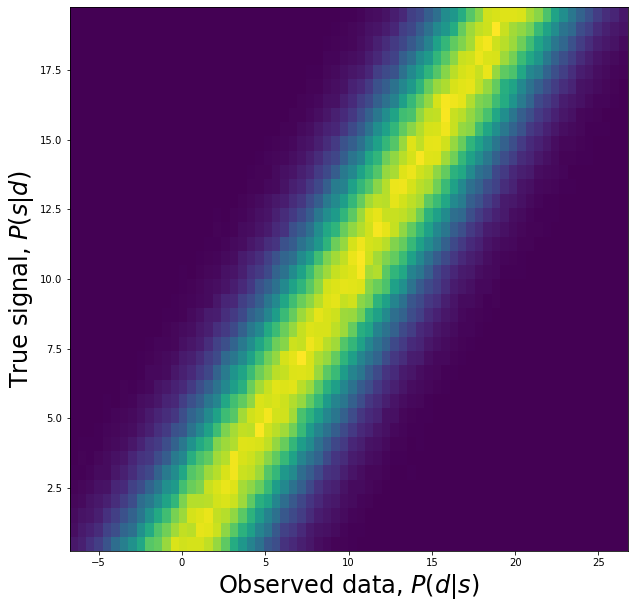

In [120]:
bkgd = stats.norm.rvs(loc = 0., scale = 3, size = 1000000)

signal =np.random.uniform(0,20,1000000)

data = bkgd + signal

signaledges = np.linspace(0,20,40)
dataedges = np.linspace(-7,27,68)

Psd, temp, temp2= np.histogram2d(data,signal, bins=[dataedges,signaledges], density=True)

datacenters = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

1b.Select a true injected signal and plot  𝑃(𝑑|𝑠) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it. [Hint: this was also shown in class.]

5.384615384615384


Text(0.5, 1.0, 'A horizontal stripe with signal value = 5.38+-0.51')

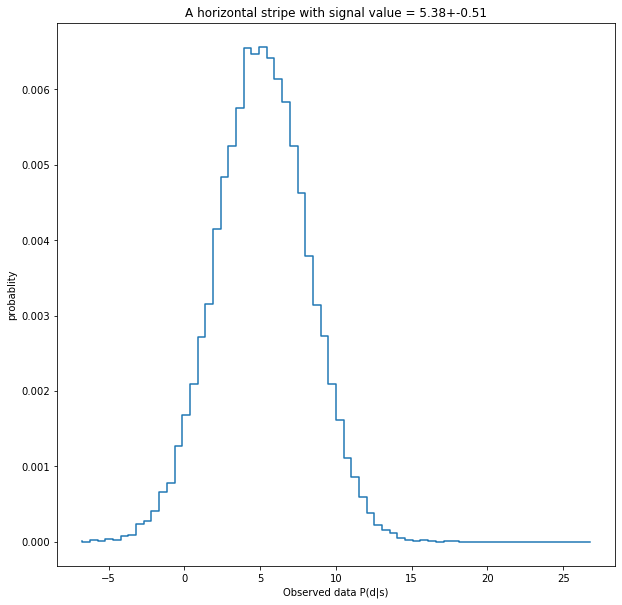

In [121]:
plt.step(datacenters,Psd[:,10])
print(signalcenters[10])
plt.ylabel("probablity")
plt.xlabel("Observed data P(d|s)")
plt.title("A horizontal stripe with signal value = 5.38+-0.51")

The above graph is showing a horizontal strip corresponding to signal value =5.38, the probablities of observed data (signal + backrground) are plotted. It is showing the probablity of observed signal value if a signal of 5.38 is measured. 

1c.Select an observed data value and plot  𝑃(𝑠|𝑑) . (Use a stair style plot). Label your plot and clearly explain what you are plotting and how to interpret it.

8.477611940298509


Text(0.5, 1.0, 'A vertical stripe at with observed data =8.48+-0.51')

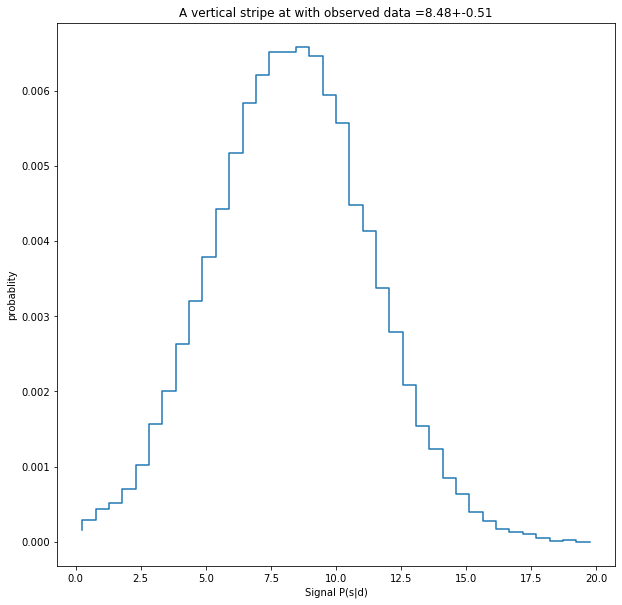

In [122]:
plt.step(signalcenters,Psd[30,:])
print(datacenters[30])
plt.ylabel("probablity")
plt.xlabel("Signal P(s|d)")
plt.title("A vertical stripe at with observed data =8.48+-0.51")

The above graph is showing a vertical strip corresponding to observed data =8.48, the probablities of  signal are plotted. It is showing the probablity of true signal strenght for a measurement of 8.48. 

Problem 2.
Now repeat the above, but with a background with non-zero mean. The easiest way would be to still have Guassian distribution but with a non-zero mean. [Hint: move it by at least a couple of  𝜎 ]. Reproduce the graphs above. Lastly overplot the  𝑃(𝑑|𝑠)  and  𝑃(𝑠|𝑑)  plots. Why are they not centered on the same value? Explain carefully.

Text(0.5, 0, 'Observed data, $P(d|s)$')

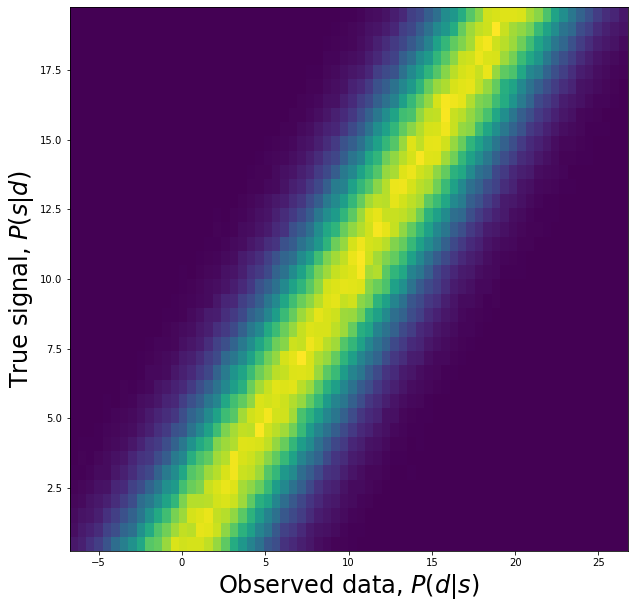

In [123]:
bkgd1 = stats.norm.rvs(loc = 6, scale = 3, size = 1000000)

signal1 =np.random.uniform(0,20,1000000)

data1 = bkgd1 + signal1

signaledges1 = np.linspace(0,20,40)
dataedges1 = np.linspace(-7,27,68)

Psd1, temp1, temp21= np.histogram2d(data1,signal1, bins=[dataedges1,signaledges1], density=True)

datacenters1 = (dataedges[:-1] + dataedges[1:]) / 2
signalcenters1 = (signaledges[:-1] + signaledges[1:]) / 2
plt.pcolormesh(datacenters,signalcenters,Psd.T)
plt.ylabel('True signal, $P(s|d)$', fontsize = 24)
plt.xlabel('Observed data, $P(d|s)$', fontsize = 24)

5.384615384615384


Text(0.5, 1.0, 'A horizontal stripe with signal value = 5.38+-0.51')

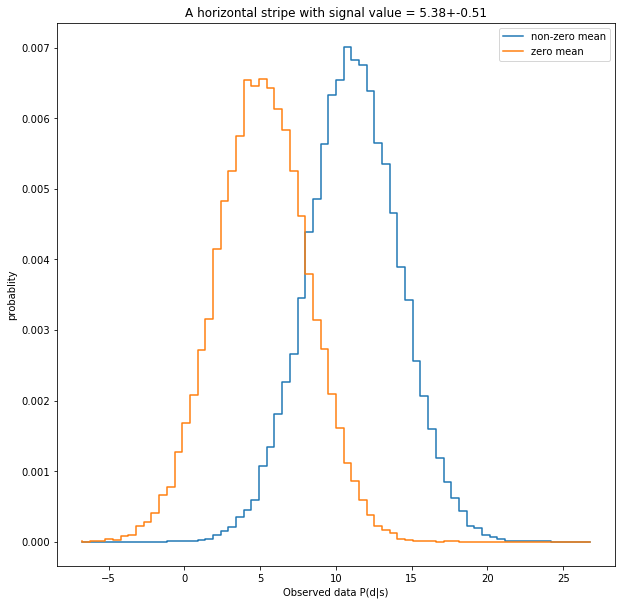

In [124]:
plt.step(datacenters1,Psd1[:,10],label="non-zero mean")
plt.step(datacenters,Psd[:,10],label="zero mean")
print(signalcenters1[10])
plt.legend()
plt.ylabel("probablity")
plt.xlabel("Observed data P(d|s)")
plt.title("A horizontal stripe with signal value = 5.38+-0.51")

They are not centered on the same value because now the background has an average value of 6. The range of possible oberved data is no longer centered at 5.38+0 (in the zero-mean case), but 5.38+6.

8.477611940298509


Text(0.5, 1.0, 'A vertical stripe at with observed data =8.48+-0.51')

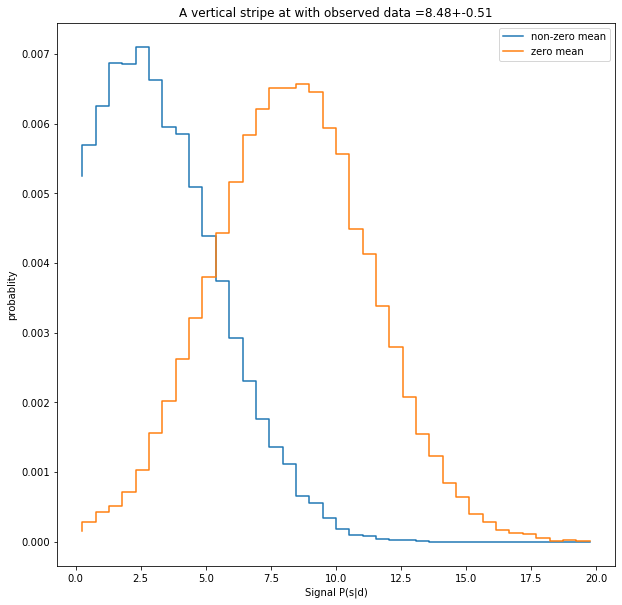

In [125]:
plt.step(signalcenters1,Psd1[30,:],label="non-zero mean")
plt.step(signalcenters,Psd[30,:],label="zero mean")

print(datacenters[30])
plt.legend()
plt.ylabel("probablity")
plt.xlabel("Signal P(s|d)")
plt.title("A vertical stripe at with observed data =8.48+-0.51")

They are not centered on the same value because now the background has an average value of 6. The range of possible true signal strengths is no longer centered at 8.48-0 (in the zero-mean case), but 8.48-6.

In [126]:
!jupyter nbconvert --to html HW5.ipynb

[NbConvertApp] Converting notebook HW5.ipynb to html
[NbConvertApp] Writing 431730 bytes to HW5.html
